# Appception Project
## Group Member: Purvi Kakkasagar, Aditya Kismatrao, Wenzhe Wu
## Group Name: PAWthon

### Introduction

Our project (AppCeption!) aims to find out interesting characteristics of the mobile apps in the app store. Since we are now in the mobile era, it is important to get to know these apps which have accompanied us 24/7. As we all know there’s already a ranking for every app store, Do you want to know how the apps compare to each other based on different metrics? And do you want to know the differentiation between your favorite apps?! 

**Spoiler Alert**
Facebook and amazon are way behind... not even in the top 20 apps based on number of ratings, surprising isn't it? There are plenty of interesting and mind boggling revelations about mobile apps you'll learn through this project!

### Primitive Data set:
In our project we initailly used https://apps.apple.com/us/genre/ios-games/id6014 this website for scraping the data of games and this data set contained only 100 rows of games and columns contained 8 columns which gave following information about an app :- Name, developer, size, age, ratings, url, number of ratings and genre.

### Import Packages

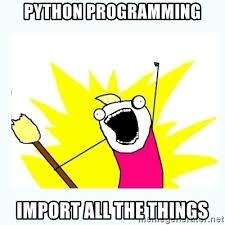

In our project, we use requests and BeautifulSoup to scrape the data from App Store. Then we process the data using pandas and numpy. Finally, we use various packages including wordcloud, plotly, matplotlib, etc. to analyze and visualize our our App data.

In [1]:
# Import necessary packages
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import iplot
from PIL import Image
import ipywidgets as widgets
from IPython.display import display

### Initial Testing on Games

We use requests and BeautifulSoup together to scrape the data from Apple App Store. We examined our scraping code on a smaller scale - the Games and made several changes and improvements based on the result. After several times of debugging we got the below scraping code and the initial data set.

In [2]:
# Import necessary packages
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# Get app url
games_url = 'https://apps.apple.com/us/genre/ios-games/id6014'

# Get page source code
games_page = requests.get(games_url)

# 'BeautifulSoup' the code
games_soup = BeautifulSoup(games_page.text, 'html.parser')

In [3]:
# Define a function to get a row
def gamerow(row = 0):
    
    # Make sure to skip the header row
    if row >= 0:
        
        # Create an empty dictionary to store each cell
        gamerow = {}
        
        # Get page url
        game_url = games_soup.find(name = 'div', id = 'selectedcontent').find_all(name = 'a')[row].get('href')

        # Get page source code
        game_page = requests.get(game_url)

        # 'BeautifulSoup' the code
        game_soup = BeautifulSoup(game_page.text, 'html.parser')
    
        a = game_soup.find(name = 'h1')
        name = list(a)[0]
        s = name.splitlines()[1]
        gamerow['Name'] = s.strip()
        
        gamerow['Age'] = list(game_soup.find(name = 'h1'))[1].text
        
        rate = game_soup.find(class_= 'we-rating-count star-rating__count')
        nr = list(rate)
        gamerow['Rating'] = nr[0][0:3]
        gamerow['Number of Ratings']= nr[0][5:len(nr[0])]
        
        dev = game_soup.find(name='a',class_='link')
        gamerow['Developer'] = list(dev)
        
        crew = game_soup.find(class_="inline-list__item").text
        gamerow['Genre'] = crew.strip()
        
        gamerow['URL'] = game_url
        
        gamerow['Size'] = game_soup.find_all(name = 'dd', class_= 'information-list__item__definition l-column medium-9 large-6')[1].text
        
        # Convert it to a dataframe
        gamedf = pd.DataFrame(gamerow, index = [0])
        return gamedf
    else:
        raise Exception('Please enter a number bigger than 0.')

In [4]:
# Create an empty dataframe for all rows
games = pd.DataFrame()

# Loop over all rows and append them to the dataframe
for i in range(0,100):
    try:
        games = games.append(gamerow(i),ignore_index = True)
        time.sleep(0.1)
    except:
        continue

#### Primitive cleaning 
We initiated a cleaning of this initial dataset just to see if we can work with the dataset we have. This was pivotal in helping us understand how to clean the final datastep which is done in the later steps.

In [5]:
# Cleaninig data
games['Genre'] = games['Genre'].str.replace('\d+', '')
games['Genre'] = games['Genre'].str.replace('# in', '')

# Rearranging columns
games = games[['Name', 'Developer', 'Size', 'Genre', 'Age', 'Rating', 'Number of Ratings', 'URL']]

# Preview the Data
games.head(10)

Name                                Developer      Size  \
0       Pokémon GO        
          Niantic, Inc.
          300.2 MB   
1   Subway Surfers                
          Kiloo
          234.1 MB   
2       Temple Run  
          Imangi Studios, LLC
          155.5 MB   
3     8 Ball Pool™         
          Miniclip.com
          151.6 MB   
4  Super Mario Run   
          Nintendo Co., Ltd.
          261.5 MB   
5     Trivia Crack              
          Etermax
          437.6 MB   
6     Temple Run 2  
          Imangi Studios, LLC
          189.9 MB   
7   Clash of Clans            
          Supercell
          189.9 MB   
8     Fruit Ninja®    
          Halfbrick Studios
          155.7 MB   
9        Solitaire         
          MobilityWare
          237.2 MB   

           Genre Age Rating Number of Ratings  \
0   Role Playing  9+    4.0    213.3K Ratings   
1         Action  9+    4.6    227.1K Ratings   
2         Action  9+    4.4    110.9K Ratings   
3         Sports  4+    4.7      1.4M Ratings   
4         Action  4+    3.8     35.4K Ratings   
5         Trivia  4+    4.5    382.8K Ratings   
6      Adventure  9+    4.6    235.4K Ratings   
7       Strategy  9+    4.8        1M Ratings   
8         Action  4+    4.0      7.5K Ratings   
9         Casino  4+    4.7    756.4K Ratings   

                                                 URL  
0  https://apps.apple.com/us/app/pok%C3%A9mon-go/...  
1  https://apps.apple.com/us/app/subway-surfers/i...  
2  https://apps.apple.com/us/app/temple-run/id420...  
3  https://apps.apple.com/us/app/8-ball-pool/id54...  
4  https://apps.apple.com/us/app/super-mario-run/...  
5  https://apps.apple.com/us/app/trivia-crack/id6...  
6  https://apps.apple.com/us/app/temple-run-2/id5...  
7  https://apps.apple.com/us/app/clash-of-clans/i...  
8  https://apps.apple.com/us/app/fruit-ninja/id40...  
9  https://apps.apple.com/us/app/solitaire/id3599...

In [6]:
games['Number of Ratings'] = games['Number of Ratings'].str.replace(".", "")
games['Number of Ratings'] = games['Number of Ratings'].str.replace("Ratings", "")
games['Number of Ratings'] = games['Number of Ratings'].str.replace("M", "000000")
games['Number of Ratings'] = games['Number of Ratings'].str.replace("K", "000")

Below are some basic stats about the Games. Running some four 5 basics to see whether we can work on the big data later

In [7]:
games['Genre'].value_counts()

 Action          17
 Adventure       10
 Board            9
 Racing           9
 Role Playing     7
 Strategy         7
 Word             6
 Sports           6
 Simulation       5
 Puzzle           5
 Family           4
 Music            4
 Casual           3
 Casino           3
 Trivia           2
., .K Ratings     1
 Card             1
Name: Genre, dtype: int64

In [9]:
games.sort_values(['Rating'],ascending=[0]).head(20)

Name  \
15    Bike Race: Free Style Games   
48                     Unblock Me   
32                     Wordscapes   
78  Pixel Gun 3D: FPS PvP Shooter   
84    BitLife - #1 Life Simulator   
83                        ▻Sudoku   
37          Call of Duty®: Mobile   
23  Sniper 3D: Gun Shooting Games   
46                  Real Racing 3   
89             Dragon City Mobile   
22                Mario Kart Tour   
44          Plants vs. Zombies™ 2   
7                  Clash of Clans   
69      The Simpsons™: Tapped Out   
43                        Hay Day   
34          Candy Crush Soda Saga   
55            Asphalt 8: Airborne   
73    MARVEL Contest of Champions   
56         Hungry Shark Evolution   
57                      Toy Blast   

                                          Developer      Size          Genre  \
15               
          Top Free Games
          191.2 MB         Racing   
48          
          Kiragames Co., Ltd.
           95.7 MB          Board   
32              
          PeopleFun, Inc.
          187.8 MB           Word   
78                  
          Cubic Games
            1.6 GB     Simulation   
84             
          Candywriter, LLC
          118.4 MB   Role Playing   
83                  
          Finger Arts
           95.8 MB          Board   
37  
          Activision Publishing, Inc.
            1.8 GB         Action   
23           
          Fun Games For Free
          291.4 MB         Action   
46              
          Electronic Arts
          685.9 MB         Racing   
89                 
          Social Point
          200.3 MB   Role Playing   
22           
          Nintendo Co., Ltd.
            199 MB         Action   
44                       
          PopCap
          125.4 MB      Adventure   
7                     
          Supercell
          189.9 MB       Strategy   
69              
          Electronic Arts
           84.5 MB      Adventure   
43                    
          Supercell
          158.4 MB         Family   
34                         
          King
          255.9 MB         Puzzle   
55                     
          Gameloft
            2.5 GB         Racing   
73            
          Kabam Games, Inc.
            224 MB      Adventure   
56                      
          Ubisoft
          295.4 MB         Action   
57                   
          Peak Games
          401.8 MB         Puzzle   

    Age Rating Number of Ratings  \
15   4+    4.9          3746000    
48   4+    4.9           119000    
32   4+    4.9          4674000    
78  12+    4.8          6034000    
84  17+    4.8          8065000    
83   4+    4.8          3532000    
37  17+    4.8          6655000    
23  17+    4.8         18000000    
46   4+    4.8          2425000    
89   4+    4.8          3693000    
22   4+    4.8          7688000    
44   9+    4.8          2338000    
7    9+    4.8          1000000    
69  12+    4.7           874000    
43   4+    4.7          2268000    
34   4+    4.7          2093000    
55  12+    4.7          1157000    
73  12+    4.7          3394000    
56  12+    4.7           406000    
57   4+    4.7          6694000    

                                                  URL  
15  https://apps.apple.com/us/app/bike-race-free-s...  
48  https://apps.apple.com/us/app/unblock-me/id315...  
32  https://apps.apple.com/us/app/wordscapes/id120...  
78  https://apps.apple.com/us/app/pixel-gun-3d-fps...  
84  https://apps.apple.com/us/app/bitlife-1-life-s...  
83   https://apps.apple.com/us/app/sudoku/id366247306  
37  https://apps.apple.com/us/app/call-of-duty-mob...  
23  https://apps.apple.com/us/app/sniper-3d-gun-sh...  
46  https://apps.apple.com/us/app/real-racing-3/id...  
89  https://apps.apple.com/us/app/dragon-city-mobi...  
22  https://apps.apple.com/us/app/mario-kart-tour/...  
44  https://apps.apple.com/us/app/plants-vs-zombie...  
7   https://apps.apple.com/us/app/clash-of-clans/i...  
69  https://apps.apple.com/us

In [10]:
games['Number of Ratings'] = games['Number of Ratings'].astype(int)

In [11]:
games.sort_values(['Number of Ratings'],ascending=[0]).head(10)

Name                                Developer  \
10                       Fortnite           
          Epic Games
           
14                         Roblox   
          Roblox Corporation
           
23  Sniper 3D: Gun Shooting Games   
          Fun Games For Free
           
74                     Toon Blast           
          Peak Games
           
16    Episode - Choose Your Story  
          Episode Interactive
           
3                    8 Ball Pool™         
          Miniclip.com
           
42  Bowmasters - Multiplayer Game          
          Playgendary
           
60                        Hole.io               
          Voodoo
           
36                     Helix Jump               
          Voodoo
           
24                   Clash Royale            
          Supercell
           

        Size          Genre  Age Rating  Number of Ratings  \
10  200.9 MB      Adventure  12+    4.6           48000000   
14  182.3 MB      Adventure  12+    4.6           18000000   
23  291.4 MB         Action  17+    4.8           18000000   
74  333.5 MB         Puzzle   4+    4.7           16000000   
16  184.6 MB   Role Playing  12+    4.7           16000000   
3   151.6 MB         Sports   4+    4.7           14000000   
42  661.5 MB         Action  12+    4.6           14000000   
60  394.2 MB         Sports  12+    4.6           13000000   
36  310.7 MB         Action  12+    4.6           13000000   
24  157.9 MB       Strategy   9+    4.7           12000000   

                                                  URL  
10  https://apps.apple.com/us/app/fortnite/id12613...  
14   https://apps.apple.com/us/app/roblox/id431946152  
23  https://apps.apple.com/us/app/sniper-3d-gun-sh...  
74  https://apps.apple.com/us/app/toon-blast/id117...  
16  https://apps.apple.com/us/app/episode-choose-y...  
3   https://apps.apple.com/us/app/8-ball-pool/id54...  
42  https://apps.apple.com/us/app/bowmasters-multi...  
60  https://apps.apple.com/us/app/hole-io/id138911...  
36  https://apps.apple.com/us/app/helix-jump/id134...  
24  https://apps.apple.com/us/app/clash-royale/id1...

In [12]:
games[games['Age'].str.contains("17")].sort_values(['Number of Ratings'],ascending=[0])

Name  \
23  Sniper 3D: Gun Shooting Games   
84    BitLife - #1 Life Simulator   
38                    PUBG MOBILE   
37          Call of Duty®: Mobile   
97     Zynga Poker - Texas Holdem   
94                   Happy Wheels   
62            Deer Hunter Classic   

                                            Developer      Size  \
23             
          Fun Games For Free
          291.4 MB   
84               
          Candywriter, LLC
          118.4 MB   
38  
          Tencent Mobile International Limite...    2.3 GB   
37    
          Activision Publishing, Inc.
            1.8 GB   
97                     
          Zynga Inc.
          294.5 MB   
94                    
          Jim Bonacci
           85.8 MB   
62                  
          Glu Games Inc
          303.6 MB   

            Genre  Age Rating  Number of Ratings  \
23         Action  17+    4.8           18000000   
84   Role Playing  17+    4.8            8065000   
38       Strategy  17+    4.5            7728000   
37         Action  17+    4.8            6655000   
97         Casino  17+    4.6             438000   
94         Racing  17+    4.5             205000   
62  ., .K Ratings  17+    4.3              44000   

                                                  URL  
23  https://apps.apple.com/us/app/sniper-3d-gun-sh...  
84  https://apps.apple.com/us/app/bitlife-1-life-s...  
38  https://apps.apple.com/us/app/pubg-mobile/id13...  
37  https://apps.apple.com/us/app/call-of-duty-mob...  
97  https://apps.apple.com/us/app/zynga-poker-texa...  
94  https://apps.apple.com/us/app/happy-wheels/id6...  
62  https://apps.apple.com/us/app/deer-hunter-clas...

## Appception Project
Now that we could successfully scrape and clean and anlalyze the small dataset of apple appstore it was time to implement it on a larger scale. So the challenge of scraping a bigger dataset began.

### Final Dataset:
For getting the final dataset we used the following " https://apps.apple.com/us/genre/ios/id36 " website to get the dataset which had 5487 rows and 11 columns. These columns depicted vital information such index, app name, age, rating, developer name, genre, number of ratings, url, size, category and rank.

# Step 1: Web Scraping

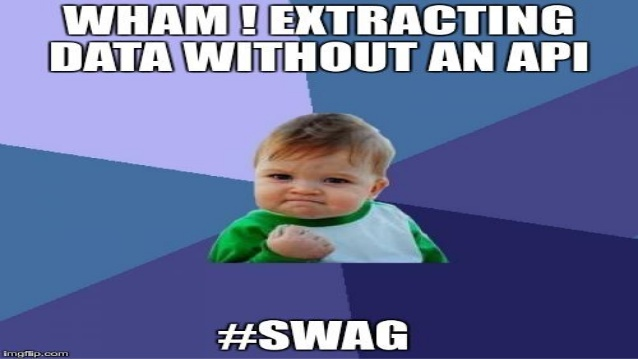

Different from the initial testing, this time we have to scrape app data of all genres ranging from Books, Business, Finance, education to  entertainment, food and drinks, photo and videos, social media apps and many more. And the challenge is they are on different pages. Thus, we have to use BeautifulSoup within a BeautifulSoup to get all those data. For the rest of the scraping, we can reference our previous scraping code.

In [13]:
# Get all the categories' code
start_url = 'https://apps.apple.com/us/genre/ios-books/id6018'
start_page = requests.get(start_url)
start_soup = BeautifulSoup(start_page.text, 'html.parser')
all_urls = {}
for i in range(0,25):
    all_urls[i] = start_soup.find(name = 'ul', class_ = 'list column first').find_all('a')[i].get('href')

Caution the code can take about 4 hours for complete scraping

In [ ]:
# Create an empty DataFrame to store all the data
df = pd.DataFrame()

for i, apps_url in all_urls.items():

    # Get page source code
    apps_page = requests.get(apps_url)

    # 'BeautifulSoup' the code
    apps_soup = BeautifulSoup(apps_page.text, 'html.parser')
    
    # Define a function to get a row
    def appsrow(row = 0):
        
        # Create an empty dictionary to store each cell
        approw = {}

        # Get page url
        app_url = apps_soup.find(name = 'div', id = 'selectedcontent').find_all(name = 'a')[row].get('href')

        # Get page source code
        app_page = requests.get(app_url)

        # 'BeautifulSoup' the code
        app_soup = BeautifulSoup(app_page.text, 'html.parser')

        a = app_soup.find(name = 'h1')
        name = list(a)[0]
        s = name.splitlines()[1]
        approw['Name'] = s.strip()

        approw['Age'] = list(app_soup.find(name = 'h1'))[1].text

        rate = app_soup.find(class_= 'we-rating-count star-rating__count')
        nr = list(rate)
        approw['Rating'] = nr[0][0:3]
        approw['Number of Ratings']= nr[0][5:len(nr[0])]

        dev = app_soup.find(name='a',class_='link')
        approw['Developer'] = list(dev)

        crew = app_soup.find(class_="inline-list__item").text
        approw['Genre'] = crew.strip()

        approw['URL'] = app_url

        approw['Size'] = app_soup.find_all(name = 'dd', class_= 'information-list__item__definition l-column medium-9 large-6')[1].text
        
        approw['Category'] = app_soup.find_all(name = 'dd', class_="information-list__item__definition l-column medium-9 large-6")[2].text

        # Convert it to a dataframe
        appdf = pd.DataFrame(approw, index = [0])
        return appdf
    
    # Create an empty dataframe for all rows
    apps = pd.DataFrame()

    # Loop over all rows and append them to the dataframe
    for i in range(0,240):
        try:
            apps = apps.append(appsrow(i),ignore_index = True)
        except:
            continue
    
    df = pd.concat([df, apps], ignore_index=True)

##### We observed that such heavy dataset required hours of scraping, and on top of that there's fear of getting blocked as well. Thus, optimal solution was to execute the code correctly and then store the scrapped data locally on the drive for future use.

In [14]:
# Store the data locally for future use
df.to_csv('appception.csv', header = None, index = False)

# Load dataset locally
df = pd.read_csv('appception.csv')

# Preview the initial data
df.head(10)

Name  Age  Rating Number of Ratings  \
0                   Amazon Kindle   4+     4.8      1.6M Ratings   
1  Audible audiobooks & originals   4+     4.9      2.4M Ratings   
2                         Wattpad  17+     4.7    283.4K Ratings   
3  OverDrive: eBooks & audiobooks   4+     4.6       31K Ratings   
4                            NOOK   4+     4.8     67.9K Ratings   
5         Goodreads: Book Reviews   4+     4.8    326.9K Ratings   
6      Yarn - Chat & Text Stories  17+     3.3     15.5K Ratings   
7               Google Play Books   4+     4.6      8.3K Ratings   
8  Audiobooks.com: New audiobooks   4+     4.7     38.9K Ratings   
9    Scribd - audiobooks & ebooks  12+     4.8     21.7K Ratings   

                                     Developer         Genre  \
0        \n          AMZN Mobile LLC\n           #2 in Books   
1          \n          Audible, Inc.\n           #1 in Books   
2           \n          Wattpad Corp\n           #4 in Books   
3        \n          OverDrive, Inc.\n           #9 in Books   
4         \n          Barnes & Noble\n          #15 in Books   
5              \n          Goodreads\n          #12 in Books   
6    \n          Science Mobile, LLC\n           #5 in Books   
7             \n          Google LLC\n           #8 in Books   
8  \n          RB Audiobooks USA LLC\n          #20 in Books   
9                 \n          Scribd\n          #17 in Books   

                                                 URL      Size Category  
0  https://apps.apple.com/us/app/amazon-kindle/id...  141.7 MB    Books  
1  https://apps.apple.com/us/app/audible-audioboo...   96.4 MB    Books  
2  https://apps.apple.com/us/app/wattpad/id306310789  152.9 MB    Books  
3  https://apps.apple.com/us/app/overdrive-ebooks...     33 MB    Books  
4     https://apps.apple.com/us/app/nook/id373582546  132.3 MB    Books  
5  https://apps.apple.com/us/app/goodreads-book-r...  102.5 MB    Books  
6  https://apps.apple.com/us/app/yarn-chat-text-s...   99.4 MB    Books  
7  https://apps.apple.com/us/app/google-play-book...   62.2 MB    Books  
8  https://apps.apple.com/us/app/audiobooks-com-n...   63.2 MB    Books  
9  https://apps.apple.com/us/app/scribd-audiobook...  303.6 MB    Books

# Step 2: Data Cleaning

Intially, we had about 8 columns to clean in the previous dataset. However, When implementing scraping on the larger dataset, cleaning had to be more efficient.

Based on the above dataset, we found the Genre column to be consisting of 'Category' & 'Rank'. We split this column into the following 2 more columns for refined results. 

Apart form that, we faced severe issue where most of the column datatypes were non-numerical. Hence, we removed period, spaces, special characters, & words from the potentially numeric columns. For eg, Number of Ratings required the most cleaning. It required converting "K","M" characters to be transformed to equivalent numeric values.(8.3K=83000 , 1.4M=1400000)

Similarly, we converted every value from Size column into megabits by multiplying 1024 for MB and dividing 1024 in the case of KB.

Lastly, Developer column required cleaning of special characters like "/n"


In [15]:
# Clean the whitespaces of Developer Column
df['Developer'] = df['Developer'].str.strip()

# Split the Genre column to Rank and Genre
df.loc[df['Genre'].str.contains('Ratings'), 'Genre'] = 'No Genre specified'
df["Rank"] = df["Genre"].str.extract("(\d*\.?\d+)", expand=True)
df['Genre'] = df['Genre'].str.replace('\d+', '')
df['Genre'] = df['Genre'].str.replace('# in', '')

# Clean the Number of Ratings Data
df['Number of Ratings'] = df['Number of Ratings'].str.replace(".", "")
df['Number of Ratings'] = df['Number of Ratings'].str.replace("Ratings", "")
df['Number of Ratings'] = df['Number of Ratings'].str.replace("Rating", "")
df['Number of Ratings'] = df['Number of Ratings'].str.replace("M", "000000")
df['Number of Ratings'] = df['Number of Ratings'].str.replace("K", "000")

# Convert the Rank and Number of Ratings to float64
df['Rank'] = df['Rank'].astype('float64')
df['Number of Ratings'] = df['Number of Ratings'].astype('float64')

# Clean the Size column and use MB as a general format
li=[]
for i in df['Size']:
    if "MB" in i:
        i=i.replace("MB","")
        li.append(i)
    elif "GB" in i:
        i=i.replace("GB","")
        i=float(i)*1024
        li.append(i)
    elif "KB" in i:
        i=i.replace("KB","")
        i=float(i)/1024
        li.append(i)

df['Size']=li

# Convert it to float64 and rename it
df['Size'] = df['Size'].astype('float64')
df = df.rename(columns={"Size": "Size in MB"})

In [16]:
# Data after cleaning
df.head(10)

Name  Age  Rating  Number of Ratings  \
0                   Amazon Kindle   4+     4.8         16000000.0   
1  Audible audiobooks & originals   4+     4.9         24000000.0   
2                         Wattpad  17+     4.7          2834000.0   
3  OverDrive: eBooks & audiobooks   4+     4.6            31000.0   
4                            NOOK   4+     4.8           679000.0   
5         Goodreads: Book Reviews   4+     4.8          3269000.0   
6      Yarn - Chat & Text Stories  17+     3.3           155000.0   
7               Google Play Books   4+     4.6            83000.0   
8  Audiobooks.com: New audiobooks   4+     4.7           389000.0   
9    Scribd - audiobooks & ebooks  12+     4.8           217000.0   

               Developer   Genre  \
0        AMZN Mobile LLC   Books   
1          Audible, Inc.   Books   
2           Wattpad Corp   Books   
3        OverDrive, Inc.   Books   
4         Barnes & Noble   Books   
5              Goodreads   Books   
6    Science Mobile, LLC   Books   
7             Google LLC   Books   
8  RB Audiobooks USA LLC   Books   
9                 Scribd   Books   

                                                 URL  Size in MB Category  \
0  https://apps.apple.com/us/app/amazon-kindle/id...       141.7    Books   
1  https://apps.apple.com/us/app/audible-audioboo...        96.4    Books   
2  https://apps.apple.com/us/app/wattpad/id306310789       152.9    Books   
3  https://apps.apple.com/us/app/overdrive-ebooks...        33.0    Books   
4     https://apps.apple.com/us/app/nook/id373582546       132.3    Books   
5  https://apps.apple.com/us/app/goodreads-book-r...       102.5    Books   
6  https://apps.apple.com/us/app/yarn-chat-text-s...        99.4    Books   
7  https://apps.apple.com/us/app/google-play-book...        62.2    Books   
8  https://apps.apple.com/us/app/audiobooks-com-n...        63.2    Books   
9  https://apps.apple.com/us/app/scribd-audiobook...       303.6    Books   

   Rank  
0   2.0  
1   1.0  
2   4.0  
3   9.0  
4  15.0  
5  12.0  
6   5.0  
7   8.0  
8  20.0  
9  17.0

# Step 3 : Data Visulalization

Visualization is the vital part of the project as it helps to answer the "WHATS","WHOS" & "WHICHS" of the dataset in a better way.

## Plots - Top 10 Apps

The first What: What are the top 10 apps as per the number of raters?

The bar graph analysis gives you the top ten apps based on number of ratings as in how many people have rated the app. 
#### Before scrolling down, Guess what number will Facebook be?
#### Also, how can we forget Amazon?
#### ....





*drumrolls*

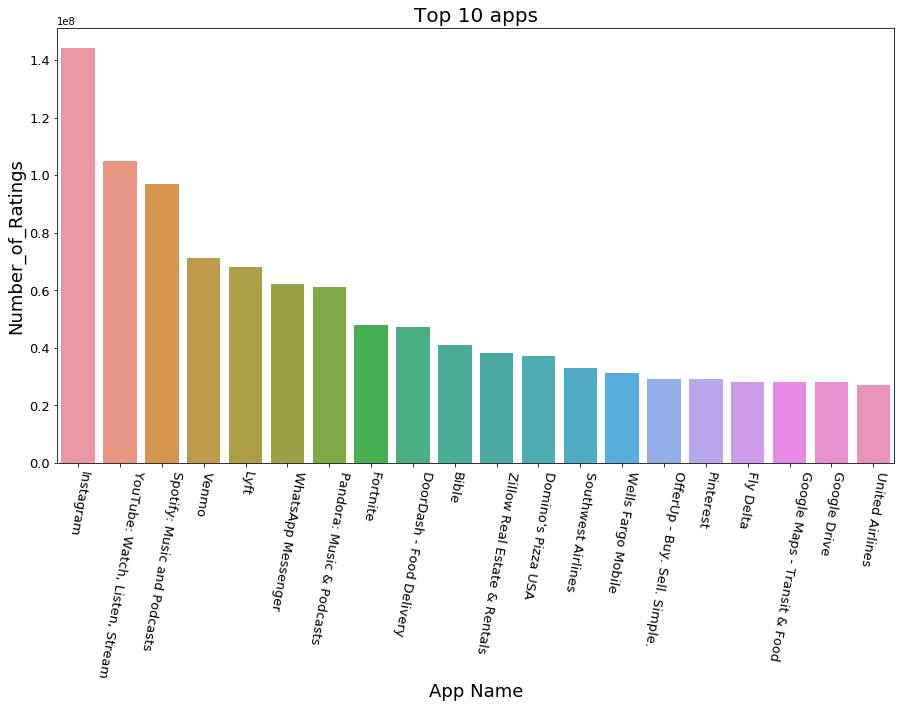

In [17]:
df = df.rename(columns={"Number of Ratings": "Number_of_Ratings"})

def pie(x, y, plot_type, title, xlabel, ylabel, rotation=False, rotation_value=60, figsize=(15,8)):
    plt.figure(figsize=figsize)
    
    if plot_type == "bar":  
        sns.barplot(x=x, y=y)
    elif plot_type == "count":  
        sns.countplot(x)
    elif plot_type == "reg":  
        sns.regplot(x=x,y=y)
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.yticks(fontsize=13)
    if rotation == True:
        plt.xticks(fontsize=13,rotation=rotation_value)
    plt.show()

bar_top = df.sort_values('Number_of_Ratings', ascending=False)
slice_bar_top = bar_top[:20]

pie(slice_bar_top.Name, slice_bar_top.Number_of_Ratings, "bar", "Top 10 apps",
          "App Name", "Number_of_Ratings", True, -100)

df = df.rename(columns={"Number_of_Ratings": "Number of Ratings"})

### Neither of those were in the top 20 apps, mindboggling isn't it?!!! 

## Scatter Plot

After working with 2 variables, we used 3 variables namely ratings, genre and number of ratings to find the correlation between them using scatter plot. When you hover over any circle you will get the the key information about the above parameters. The colour shade shows the ratings and shapes diffentiate different genres of apps.


In [18]:
data = [
    go.Scatter(
        x=grouped['Rating'],
        y=grouped['Number of Ratings'],
        text=grouped['Genre'],
        mode='markers',
        name=name,
        marker=dict(
            #symbol=i,
            sizemin=2,
            sizeref=2,
            size=grouped['Rating']*10,
            colorscale='BlueRed',
            showscale=True,
            color=df['Rating'],
            #line=dict(color='blue', width=1.8)
        ))
    for i, (name, grouped) in enumerate(df.groupby('Genre'))
]

figure = go.Figure(
    data=data,
    layout=go.Layout(
        legend=dict(x=1.2),
        width=1000,
        margin=dict(r=20),
        xaxis=dict(type='log', title='Rating'),
        yaxis=dict(title='Number of Ratings'),
        title='Rating vs Number of Ratings vs Genre'
    ))

iplot(figure)

### Photo & video is the top runner, then followed by Music. (Duh! So obvious)

## Box Plot

### Is the Rating distribution different for each category?

The below box plot shows the Rating distribution of different categories. We can see that all Games' Ratings are above 3 and 75% of them are above 4.5. People really love games, isn't it? Weather has the biggest distribution which indicates that the quality of Weather apps differ a lot from each other.

In [22]:
# Get a list of all categories
cats = list(df['Category'].unique())

# Create figure
fig = go.Figure()

# Use for loop to add every category as a trace
for cat in cats:
    yc = df[df['Category'] == cat]['Rating']
    fig.add_trace(go.Box(y=yc, name=cat))

# Show the graph
fig.update_layout(title_text="Rating distribution for each category")
fig.show()

## Pie Plots

### Which category is the main player for each age group?

The below pie plots show the percent of apps of different categories based on all age groups.

For 4+ group, Finance apps surprisingly take the 1st place, followed by Weather, Navigation and Education.

For 17+ group, shopping apps count for almost 20% of all, followed by Magazines and Health. Shopping apps are definitely adult-oriented because they got more money.

For 12+ group, News, Medical and Magazines leads the group, followed by Entertainment and Games.

For 9+ group, Finance is a big part of it, followed by Education and Music.

In [20]:
# Get a list of all age groups
ages = list(df['Age'].unique())

fig = make_subplots(rows=2, cols=2,
                    specs=[[{"type": "domain"}, {"type": "domain"}], 
                           [{"type": "domain"}, {"type": "domain"}]],
                    subplot_titles=("4+","17+", "12+", "9+"))
    
df_age = df[df['Age'] == '4+']
values = list(df_age.groupby(by = 'Category')['Name'].count())
fig.add_trace(go.Pie(labels=cats, values=values, hole=.5), row=1, col=1)

df_age = df[df['Age'] == '17+']
values = list(df_age.groupby(by = 'Category')['Name'].count())
fig.add_trace(go.Pie(labels=cats, values=values, hole=.5), row=1, col=2)

df_age = df[df['Age'] == '12+']
values = list(df_age.groupby(by = 'Category')['Name'].count())
fig.add_trace(go.Pie(labels=cats, values=values, hole=.5), row=2, col=1)

df_age = df[df['Age'] == '9+']
values = list(df_age.groupby(by = 'Category')['Name'].count())
fig.add_trace(go.Pie(labels=cats, values=values, hole=.5), row=2, col=2)

fig.update_layout(height=700, title_text="Percent of apps of each Category based on Different Age group")
fig.show()

## Word Cloud Visualization - Developers with Most Popular Apps/Games

### Which Developer has the most apps/games?

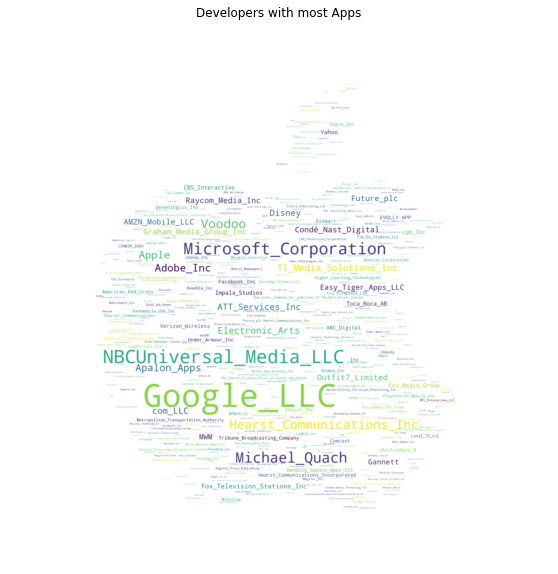

In [23]:
# Convert all the developers to one string
text = df['Developer'].str.replace('&', '')
text = text.str.replace(',', '')
text = text.str.replace(' ', '_')
text = list(text.values)
text = str(text)
text = text.replace("'", '')

# Create stopword list
stopwords = set(STOPWORDS)
stopwords.update(['Ltd', '_Ltd', 'LLC', '_LLC'])

# Get logo mask for word cloud
app_mask = np.array(Image.open('apple_logo.png'))

# Create and generate a word cloud image:
wc = WordCloud(relative_scaling = 1, prefer_horizontal = 1, background_color='white', max_words = 500, stopwords = stopwords, mask=app_mask, contour_color = 'white')
wordcloud = wc.generate(text)

# Display the generated image:
plt.figure(figsize = (100,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Developers with most Apps')
plt.axis("off")
plt.show()

We learnt the Word Cloud package back in the NLP lecture which we found very interesting. We'd like to use it to make several clouds showing the developers with the most apps, in which the size indicates the number of apps.
However, the Word Cloud can only count the frequency of one word within one string, so we have to combine the whole 'Developer' column together to get a 'Developer' string. Also, since Word Cloud can only recognize single words, we have to add _ between each word of developer names with multiple words. Finally, we need to add a few stopwords to filter out words like LLC, Ltd, etc..
In order to make our cloud look nicer, we also use the mask argument of Word Cloud to generate the final graphs.

#### Google, NBC , Microsoft are the top 3 tech giants to develop the most number of apps for apple app store.
#### Apple isn't even in the top 10, ironic isn't it?

***So next, we want to dig deeper into Google's apps and see which apps are there.***

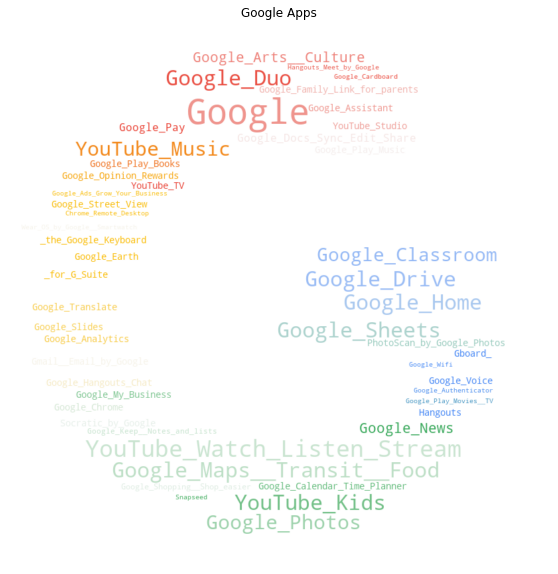

In [24]:
# Convert Google Apps to one string
df_g = df.sort_values('Number of Ratings', ascending = False)
df_g = df_g[df_g['Developer'] == 'Google LLC']
text_g = df_g['Name'].str.replace(':','')
text_g = text_g.str.replace(',','')
text_g = text_g.str.replace('-','')
text_g = text_g.str.replace('&','')
text_g = text_g.str.replace(' ','_')
text_g = list(text_g.values)
text_g = str(text_g)
text_g = text_g.replace("'",'')
text_g

# Get logo mask for word cloud
app_mask_g = np.array(Image.open('google_logo.jpg'))

# Create and generate a word cloud image
wc = WordCloud(relative_scaling = 0, prefer_horizontal = 1, background_color='white', mode='RGBA', max_words = 100, mask=app_mask_g, contour_color = 'white')
wordcloud_g = wc.generate(text_g)

# create coloring from image
image_colors = ImageColorGenerator(app_mask_g)
plt.figure(figsize = (100,10))
plt.imshow(wordcloud_g.recolor(color_func=image_colors), interpolation='bilinear')
plt.title('Google Apps')
plt.axis("off")
plt.show()

**Word Cloud 2**

The above graph includes all Google's apps. The bigger the size indicates that the app has a higher number of ratings. We also use the color generator and the mask together to make the cloud 'Google' like.
##### Google developed by Google downloaded by apple users is the app with most number of raters --> Googleception :D

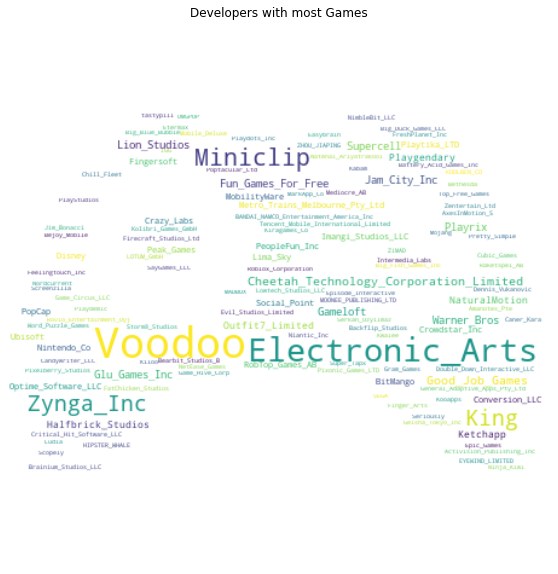

In [25]:
# Convert all the game developers to one string
text_game = df['Developer'][df['Category'] == 'Games'].str.replace('&', '')
text_game = text_game.str.replace(',', '')
text_game = text_game.str.replace(' ', '_')
text_game = list(text_game.values)
text_game = str(text_game)
text_game = text_game.replace("'", '')

# Create stopword list
stopwords = set(STOPWORDS)
stopwords.update(['Ltd', '_Ltd', 'LLC', '_LLC'])

# Get logo mask for word cloud
game_mask = np.array(Image.open('game.jpg'))

# Create and generate a word cloud image:
wc = WordCloud(prefer_horizontal = 1, background_color='white', max_words = 500, stopwords = stopwords, mask=game_mask)
wordcloud = wc.generate(text_game)

# Display the generated image:
plt.figure(figsize = (100,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Developers with most Games')
plt.axis("off")
plt.show()

**Word Cloud 3**

The above graph shows the Game Developers with the most Games. You can see Voodoo undoubtedly has the most games, followed by Electronic Arts and Miniclip.

### Finally, let's dwell into the visualization which required days of efforts and hours of google searches. We present our very own interactive comparison widget ^_^ ####


## IPyWidget - Interactive Report

For our last visualization, we imported the IPyWidget package. It is a GUI you can establish within the Juypter Notebook to interact with your data and execute self-defined functions on clicking the buttons. For our case, we can let the user input 3 apps and generate 3 graphs comparing these 3 apps.

Combobox(value='', description='App 1', ensure_option=True, options=('Amazon Kindle', 'Audible audiobooks & or…

Combobox(value='', description='App 2', ensure_option=True, options=('Amazon Kindle', 'Audible audiobooks & or…

Combobox(value='', description='App 3', ensure_option=True, options=('Amazon Kindle', 'Audible audiobooks & or…

Button(description='App Comparison', layout=Layout(left='70px', width='200px'), style=ButtonStyle())

Your most frquently used apps are: Facebook, Snapchat, Kik.


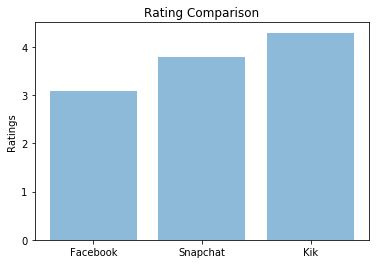

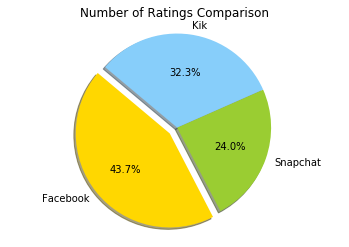

In [27]:
box_1 = widgets.Combobox(
    placeholder='Select your App',
    options=list(df['Name'].values),
    description='App 1',
    ensure_option=True,
    disabled=False
)

box_2 = widgets.Combobox(
    placeholder='Select your App',
    options=list(df['Name'].values),
    description='App 2',
    ensure_option=True,
    disabled=False
)

box_3 = widgets.Combobox(
    placeholder='Select your App',
    options=list(df['Name'].values),
    description='App 3',
    ensure_option=True,
    disabled=False
)

button = widgets.Button(
    description='App Comparison',
    layout={'left':'70px','width': '200px'}
)

def report(event):
    
    
    # Radar Chart
    categories = [box_1.value, box_2.value, box_3.value]
    r1 = float(df[df['Name'] == box_1.value]['Size in MB'].values)
    r2 = float(df[df['Name'] == box_2.value]['Size in MB'].values)
    r3 = float(df[df['Name'] == box_3.value]['Size in MB'].values)

    fig = go.Figure()

    fig.add_trace(go.Scatterpolar(
      r=[r1, r2, r3],
      theta=categories,
      fill='toself',
      name='Size'
    ))

    fig.update_layout(
        title = 'Size in MB Comparison',
        polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0, int(max(r1, r2, r3) + 50)]
        )),
      showlegend=False
    )

    fig.show()
# defining numeric parameters
    rate1 = df[df['Name'] == box_1.value]['Rating'].values
    rat1 = ' '.join(map(str, rate1))
    rate2 = df[df['Name'] == box_2.value]['Rating'].values
    rat2 = ' '.join(map(str, rate2))
    rate3 = df[df['Name'] == box_3.value]['Rating'].values
    rat3 = ' '.join(map(str, rate3))
    no1 = df[df['Name'] == box_1.value]['Number of Ratings'].values
    num1 = ' '.join(map(str, no1))
    no2 = df[df['Name'] == box_2.value]['Number of Ratings'].values
    num2 = ' '.join(map(str, no2))
    no3 = df[df['Name'] == box_3.value]['Number of Ratings'].values
    num3 = ' '.join(map(str, no3))
# Bar graph
    objects = (box_1.value, box_2.value, box_3.value)
    ratess = [rat1,rat2,rat3]
    plt.bar(objects, [float(x) for x in ratess], align='center', alpha=0.5)
    plt.ylabel('Ratings')
    plt.title('Rating Comparison')
    plt.show()
# Pie chart 
    labels = (box_1.value, box_2.value, box_3.value)
    norates = [num1,num2,num3]
    colors = ['gold', 'yellowgreen','lightskyblue']
    explode = (0.1, 0, 0)  # explode 1st slice
    plt.pie(norates, explode=explode, labels=labels, colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.title('Number of Ratings Comparison')
    plt.show()

button.on_click(report)

display(box_1, box_2, box_3, button)

Enter the names of any 3 apps or select the first apps from drop down if you are lazy :p. Here we have shown you the comparison of Facebook,Snapchat and Kik, the 3 giants of social media apps.
#### It can be observed that Facebook leads in Size, which is displayed via Radar chart.
#### Kik leads in Rating which is displayed by bar graph
#### Facebook leads in number of ratings, which is displayed by pie chart

# Conclusion 

This marks end of our project. So lets summarize what have we learn. Scraping huge dataset is the most gruesome task :p. On a serious note Appception provides you with complete comparison of 5487 apps. You can play around with various metrics such as size, ratings, genre, number of ratings, etc for interesting results.Surprisingly most of the finance app developers keep their age restriction to 4+,i wonder whether they expect the kids to up their ante by learning finance from such a small age itself. Now you know popular apps like facebook and amazon doesn't guarantee them the top position. Google and Microsoft are the one's ruling the world with their app developments in 'Apple' appstore. If you are a budding developer and want to decide which genre to select, photos and videos or music app should be your go to option. 
#### So next time you want to compare your two favourite apps our project is a fast, innovative and visually pleasing substitute to tiresome google search
#### Thank You!